## INTRODUCTION

In this project we have been hired as a Data Analyst for a company that sells filtration devices. The aim is to gain insights into customer behaviour, identify target customer segments, provide recommendation for improving sales and customer satisfaction and optimize the business's data model for improved efficiency.<br>
<br>
This project will be completed using Python and Jupyter Notebook. We will focus on the datasets given where we have SALES, INVENTORY and CUSTOMER tables. We will start by cleaning data in each of these tables, then merge them using appropriate columns. This Notebook will detail the Analysis and the thought process behind every visualization. It will also include discussions of insights and possible recommendations<br>
<br>
The Notebook will conclude with a discussion about the given data model and the recommendations to improve its efficiency.<br>
<br>
<u><strong>At the conclusion of this project, to improve sales, recommendations were identified as follows:</strong></u><br>
- The business should look to maximize the peak in sales during the months of July, August, September and October. Marketing should be intensified before and during these months.<br>
- Mining is showing a steady increase in sales. Efforts need to put in place to consolidate this customer base.<br>
- Products recorded as ‘Other’ have not recovered to pre-pandemic levels and are mostly to blame for why we don’t see an even higher increase in overall sales. These need to be identified and marketing addressed.<br>
- Customers recorded as ‘Other’ generate the most sales and they seem to be interested in filters for vehicles and hardware equipment. These are probably walk in individuals looking to buy service parts for vehicles. Efforts to market directly to them in stores should be adopted.


<br>
<strong>Author:</strong> Emmanuel Masindi<br>
<strong>Date:</strong> 08 June 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Import data**

In [3]:
sales_data = pd.read_csv('DATA/SalesCube.csv')
customers = pd.read_csv('DATA/Client.csv')
inventory = pd.read_csv('DATA/Inventory.csv')

## **PART 1: DATA CLEANING**

***- Sales Data***

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693161 entries, 0 to 693160
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer_Account       693161 non-null  object 
 1   Customer_name          693161 non-null  object 
 2   NatureofBus            689722 non-null  object 
 3   Country                692809 non-null  object 
 4   Code                   693161 non-null  object 
 5   Description_1          693160 non-null  object 
 6   ItemGroup              693161 non-null  object 
 7   ItemGroupname          693161 non-null  object 
 8   ItemClass              612027 non-null  object 
 9   TxDate                 693161 non-null  object 
 10  Reference              693161 non-null  object 
 11  SlsYear                693161 non-null  int64  
 12  FinYear                693161 non-null  int64  
 13  SlsMonth               693161 non-null  object 
 14  slsQUARTER             693161 non-nu

<font color=#e71d36>
    <strong>Discussion:</strong><br>
- Null values in most columns<br>
- Date columns are in the incorrect data types<br>
- We may struggle to understand the meaning in some column names
</font>

<AxesSubplot:>

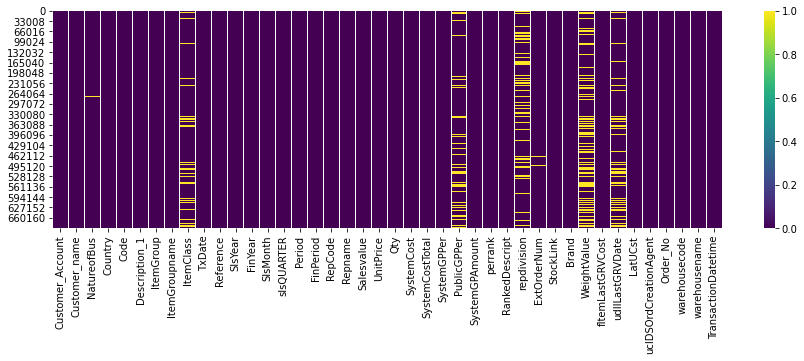

In [5]:
plt.figure(figsize=(15,4))
sns.heatmap(sales_data.isnull(), cmap='viridis')

In [6]:
sales_data.columns

Index(['Customer_Account', 'Customer_name', 'NatureofBus', 'Country', 'Code',
       'Description_1', 'ItemGroup', 'ItemGroupname', 'ItemClass', 'TxDate',
       'Reference', 'SlsYear', 'FinYear', 'SlsMonth', 'slsQUARTER', 'Period',
       'FinPeriod', 'RepCode', 'Repname', 'Salesvalue', 'UnitPrice', 'Qty',
       'SystemCost', 'SystemCostTotal', 'SystemGPPer', 'PublicGPPer',
       'SystemGPAmount', 'perrank', 'RankedDescript', 'repdivision',
       'ExtOrderNum', 'StockLink', 'Brand', 'WeightValue', 'fItemLastGRVCost',
       'udIILastGRVDate', 'LatUCst', 'ucIDSOrdCreationAgent', 'Order_No',
       'warehousecode', 'warehousename', 'TransactionDatetime'],
      dtype='object')

**For missing values in the SALES table:**
- column 'NatureofBus' replace with 'other'
- column 'Country' replace with 'other'. We could try to look for clues in other columns but data in this category is minimal
- column 'Description_1' replace with 'unknown'.
- column 'ItemClass' replace with 'other'
- column 'PublicGPPer' replace with 0
- column 'repdivision' replace with 'not_specified'
- column 'ExtOrderNum' replace with 'unknown'
- column 'Brand' replace with 'other'
- column 'WeightValue' replace with 0
- column 'udIILastGRVDate' replace with 'unknown'
- column 'ucIDSOrdCreationAgent' replace with 'unknown'
- column 'Order_No' replace with 'unknown'
- column 'warehousecode' replace with 'unknown'
- column 'warehousename' replace with 'unknown'

In [7]:
# function to replace null strings with 'other', 'unknown', '0'

def replace_null(cols, replace_with):
    value = cols
    if pd.isnull(value):
        return replace_with
    else:
        return value

In [8]:
sales_data['NatureofBus'] = sales_data['NatureofBus'].apply(lambda x:replace_null(x, 'Other'))
sales_data['Country'] = sales_data['Country'].apply(lambda x:replace_null(x, 'Other'))
sales_data['Description_1'] = sales_data['Description_1'].apply(lambda x:replace_null(x, 'unknown'))
sales_data['ItemClass'] = sales_data['ItemClass'].apply(lambda x:replace_null(x, 'Other'))
sales_data['PublicGPPer'] = sales_data['PublicGPPer'].apply(lambda x:replace_null(x, 0))
sales_data['repdivision'] = sales_data['repdivision'].apply(lambda x:replace_null(x, 'not_specified'))
sales_data['ExtOrderNum'] = sales_data['ExtOrderNum'].apply(lambda x:replace_null(x, 'unknown'))
sales_data['Brand'] = sales_data['Brand'].apply(lambda x:replace_null(x, 'Other'))
sales_data['WeightValue'] = sales_data['WeightValue'].apply(lambda x:replace_null(x, 0))
sales_data['udIILastGRVDate'] = sales_data['udIILastGRVDate'].apply(lambda x:replace_null(x, 'unknown'))
sales_data['ucIDSOrdCreationAgent'] = sales_data['ucIDSOrdCreationAgent'].apply(lambda x:replace_null(x, 'unknown'))
sales_data['Order_No'] = sales_data['Order_No'].apply(lambda x:replace_null(x, 'unknown'))
sales_data['warehousecode'] = sales_data['warehousecode'].apply(lambda x:replace_null(x, 'unknown'))
sales_data['warehousename'] = sales_data['warehousename'].apply(lambda x:replace_null(x, 'unknown'))

We will remove columns which are duplicated on other tables and which are irrelevant to this analysis. We will later merge all tables, therefore we don't want to deal with duplicated columns. Columns to be excluded:<br>
- Customer_name
- Description
- ItemGroup
- ItemGroupname
- Period
- FinPeriod
- RepName
- repdivision
- WeightValue

In [9]:
sales_data.drop(['Customer_name','Description_1','ItemGroup','ItemGroupname',
                 'Period','FinPeriod','Repname','repdivision','WeightValue'],
               axis=1, inplace=True)

<AxesSubplot:>

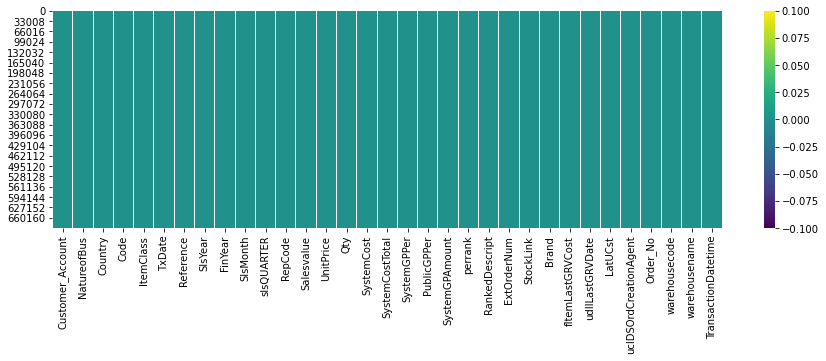

In [10]:
plt.figure(figsize=(15,4))
sns.heatmap(sales_data.isnull(), cmap='viridis')

***- Inventory Data***<br>
We will assess dataset to ensure it only has unique products for each line item

In [11]:
# inventory = pd.read_csv('DATA/Inventory.csv')

In [12]:
inventory = inventory[['StockLink','Code','Description_1','ItemGroup']]

In [13]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151608 entries, 0 to 151607
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   StockLink      151608 non-null  int64 
 1   Code           151602 non-null  object
 2   Description_1  151583 non-null  object
 3   ItemGroup      151576 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.6+ MB


**For missing values in the INVENTORY table:**
- column 'Code' replace with 'no code'
- column 'Description_1' replace with 'unknown'

In [14]:
inventory['Code'] = inventory['Code'].apply(lambda x:replace_null(x, 'no code'))
inventory['Description_1'] = inventory['Description_1'].apply(lambda x:replace_null(x, 'unknown'))

In [15]:
inventory.head()

,StockLink,Code,Description_1,ItemGroup
0,232,P92-1599,10MM BANJO,27
1,239,D1371-70,TUBING,70
2,250,D3269,RUBBER ADAPTOR,27
3,253,D4206,90DEG ELBOW,27
4,322,LF 3384,OIL FILTER (CARTRIDGE),2


***- Customer Data***<br>
We will keep columns which are relevant to the analysis

In [16]:
customers = customers[['DCLink','Account','Name','Contact_Person','Physical1','Credit_Limit','RepID',
           'Interest_Rate','Discount','DCBalance','fForeignBalance','ulARCountry','ulARProvinces']]

In [17]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DCLink           4495 non-null   int64  
 1   Account          4495 non-null   object 
 2   Name             4495 non-null   object 
 3   Contact_Person   3554 non-null   object 
 4   Physical1        3578 non-null   object 
 5   Credit_Limit     4495 non-null   float64
 6   RepID            4495 non-null   int64  
 7   Interest_Rate    4495 non-null   float64
 8   Discount         4495 non-null   float64
 9   DCBalance        3507 non-null   float64
 10  fForeignBalance  2752 non-null   float64
 11  ulARCountry      4411 non-null   object 
 12  ulARProvinces    1735 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 456.6+ KB


**For missing values in the CUSTOMERS table:**
- column 'Contact_Person' replace with 'unknown'
- column 'Physical1' replace with 'unknown'
- column 'DCBalance' replace with 0.
- column 'fForeignBalance' replace with 0
- column 'ulARCountry' replace with 'unknown'
- column 'ulARProvinces' replace with 'unknown'

In [18]:
customers['Contact_Person'] = customers['Contact_Person'].apply(lambda x:replace_null(x, 'unknown'))
customers['Physical1'] = customers['Physical1'].apply(lambda x:replace_null(x, 'unknown'))
customers['DCBalance'] = customers['DCBalance'].apply(lambda x:replace_null(x, 0))
customers['fForeignBalance'] = customers['fForeignBalance'].apply(lambda x:replace_null(x, 0))
customers['ulARCountry'] = customers['ulARCountry'].apply(lambda x:replace_null(x, 'unknown'))
customers['ulARProvinces'] = customers['ulARProvinces'].apply(lambda x:replace_null(x, 'unknown'))

In [19]:
customers.head()

,DCLink,Account,Name,Contact_Person,Physical1,Credit_Limit,RepID,Interest_Rate,Discount,DCBalance,fForeignBalance,ulARCountry,ulARProvinces
0,1,CASH_01,CASH ACCOUNT,unknown,unknown,0.0,10,0.0,0.0,0.0,2419.74,South Africa,unknown
1,2,D04036_01,D&A POWER PROD (PTY) LTD,MOIRA,SERENADE ROAD,10000.0,1,0.0,0.0,0.0,5521.80,South Africa,unknown
2,3,A01010_01,PILLMAN FOUNDRY,GLORIA,CNR JANSEN & INNES RD,4999.0,10,0.0,0.0,0.0,1750.55,South Africa,unknown
3,4,A01027_01,AMALGAMATED PANELBEATERS,THERESA,460 KETTIN,15000.0,1,0.0,0.0,0.0,0.00,South Africa,unknown
4,6,A01040_01,ATLAS FORKLIFT CLOSED,MEL/RONNY,398 MAIN REEF ROAD,3000.0,10,0.0,0.0,0.0,27189.37,South Africa,unknown


## **PART 2: DATA INTEGRATION**

We will use a ***left join*** to merge sales with inventory using 'StockLink' as the joining column. 

In [20]:
merged_df_1 = pd.merge(sales_data, inventory,
                      on=['StockLink'], how='left')

We will use a ***left join*** to merge 'merged_df_1' with customers using 'Customer_Account'

In [21]:
# Update column name to ensure merging columns are consistent

new_column_names = {'Account':'Customer_Account'}
customers.rename(columns=new_column_names, inplace=True)

In [22]:
data = pd.merge(merged_df_1, customers,
               on=['Customer_Account'], how='left')

In [28]:
data.head()

,Customer_Account,NatureofBus,Country,Code_x,ItemClass,TxDate,Reference,SlsYear,FinYear,SlsMonth,...,Contact_Person,Physical1,Credit_Limit,RepID,Interest_Rate,Discount,DCBalance,fForeignBalance,ulARCountry,ulARProvinces
0,A03123_01,Other,South Africa,P554004,Lube Filter,2018/11/16 00:00,INV0419292,2018,2018,November,...,LEANA OBERHOLZER,2 SALIGNA STR,150000.0,80,0.0,0.0,24497.01,0.0,South Africa,Gauteng
1,A03123_01,Other,South Africa,P551315,Fuel Filter,2018/11/16 00:00,INV0419292,2018,2018,November,...,LEANA OBERHOLZER,2 SALIGNA STR,150000.0,80,0.0,0.0,24497.01,0.0,South Africa,Gauteng
2,A03123_01,Other,South Africa,R 120T,Fuel Filter,2018/11/16 00:00,INV0419292,2018,2018,November,...,LEANA OBERHOLZER,2 SALIGNA STR,150000.0,80,0.0,0.0,24497.01,0.0,South Africa,Gauteng
3,A01302_01,Construction,South Africa,ACTOM-TT22-C-SERVICE,Other,2018/06/05 00:00,INV0397200,2018,2018,June,...,Nelson,186 High Road,100000.0,80,0.0,0.0,0.00,0.0,South Africa,Gauteng
4,A01302_01,Construction,South Africa,ACTOM-TT23-C-SERVICE,Other,2018/06/05 00:00,INV0397200,2018,2018,June,...,Nelson,186 High Road,100000.0,80,0.0,0.0,0.00,0.0,South Africa,Gauteng


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693161 entries, 0 to 693160
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer_Account       693161 non-null  object 
 1   NatureofBus            693161 non-null  object 
 2   Country                693161 non-null  object 
 3   Code_x                 693161 non-null  object 
 4   ItemClass              693161 non-null  object 
 5   TxDate                 693161 non-null  object 
 6   Reference              693161 non-null  object 
 7   SlsYear                693161 non-null  int64  
 8   FinYear                693161 non-null  int64  
 9   SlsMonth               693161 non-null  object 
 10  slsQUARTER             693161 non-null  object 
 11  RepCode                693161 non-null  object 
 12  Salesvalue             693161 non-null  float64
 13  UnitPrice              693161 non-null  float64
 14  Qty                    693161 non-nu

In [32]:
# we need to convert the date column into the correct datetime format

data['TxDate'] = pd.to_datetime(data['TxDate'])

# we need to filter the data to only contain values from 1 December 2018 to 30 November 2021

start_date = pd.to_datetime('2018-12-01')
end_date = pd.to_datetime('2021-11-30')
data = data[(data['TxDate'] >= start_date) & (data['TxDate'] <= end_date)]

Data Integrity has been maintained. The total number of rows of the resultant merged dataset is equal to the total row count of the sales table. We ensured to only use unique keys to join the tables; that is we ensured the joining key are indeed the primary keys for the table on the right of the join.

## **PART 3: EXPLORATORY DATA ANALYSIS**

In [112]:
plt.style.use('seaborn-whitegrid')

## **Statistical Summary**

**Categorical columns of interest:**<br>
- NatureofBus
- Country
- ItemClass
- slsQUARTER
- warehousecode
- ulARProvinces
- Brand
- ucIDSOrdCreationAgent
- Contact_Person'
- SlsYear

**Numerical columns of interest:**
- UnitPrice
- DCBalance

In [29]:
# For columns which have 20+ unique categorial features we will extract the top ten

data[['SlsYear','NatureofBus','Country','ItemClass','slsQUARTER','warehousecode',
      'ulARProvinces','Brand','ucIDSOrdCreationAgent','Contact_Person']].nunique()

SlsYear                     6
NatureofBus                18
Country                    17
ItemClass                  16
slsQUARTER                  4
warehousecode              10
ulARProvinces              10
Brand                      69
ucIDSOrdCreationAgent     255
Contact_Person           1039
dtype: int64

The last 3 columns contain a large number of unique values. We will assess the mode unto the 20th value

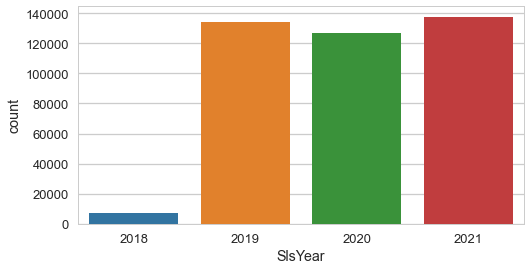

In [41]:
# let's assess the distribution of our data based on year

plt.figure(figsize=(8,4))
sns.countplot(data=data, x='SlsYear')

plt.savefig(f'img/1.png', bbox_inches='tight')

In [37]:
# let's assess the next 6 categorical columns

six_cols = ['NatureofBus','Country','ItemClass','slsQUARTER','warehousecode','ulARProvinces']

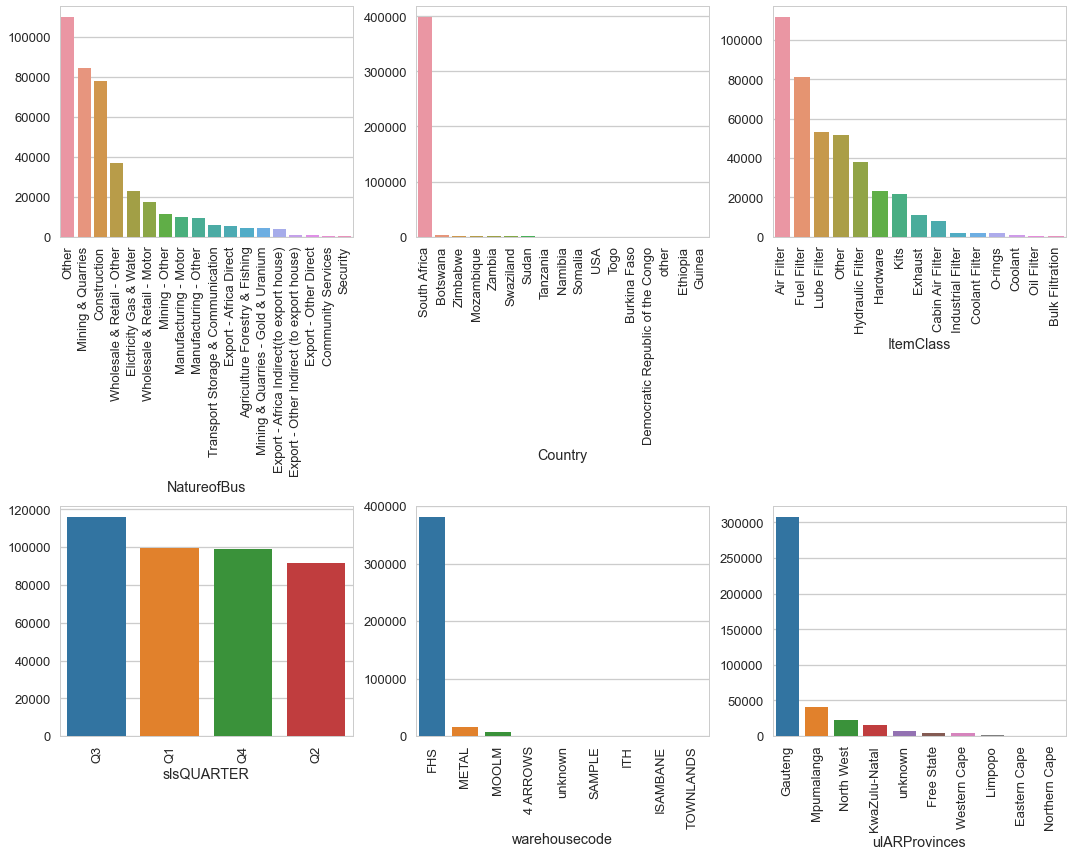

In [42]:
plt.figure(figsize=(15,12))
for i, col in enumerate(six_cols):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.ylabel('')
    plt.tight_layout()
plt.savefig(f'img/2.png', bbox_inches='tight')

In [43]:
# let's assess the next 3 categorical columns

three_cols = ['Brand','ucIDSOrdCreationAgent','Contact_Person']

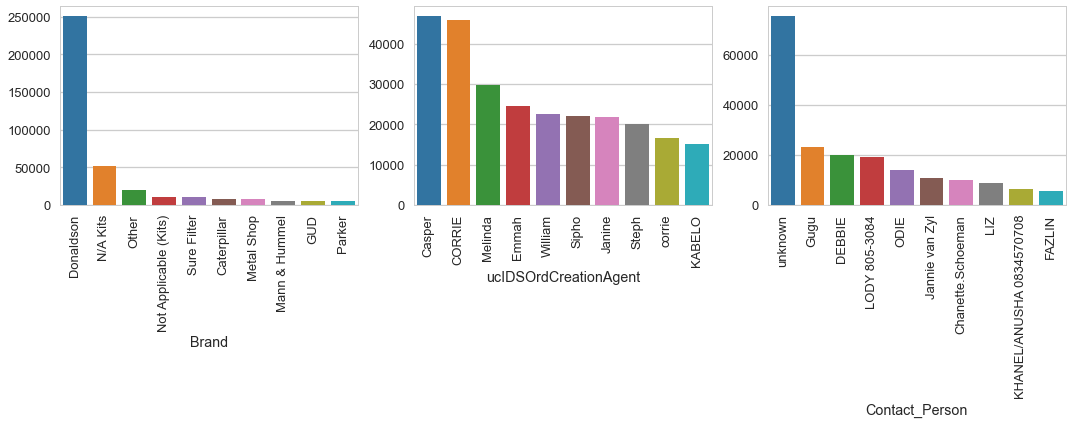

In [44]:
plt.figure(figsize=(15,6))
for i, col in enumerate(three_cols):
    
    filter_array = data.groupby(col).count().sort_values(by='Customer_Account',axis=0, ascending=False).head(10).index
    fltered_df = data[data[col].isin(filter_array)]
    
    plt.subplot(1,3,i+1)
    ax = sns.countplot(data=fltered_df, x=col, order=fltered_df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.ylabel('')
    plt.tight_layout()
plt.savefig(f'img/3.png', bbox_inches='tight')

In [45]:
# we will now assess the two numerical columns of interest
two_cols = ['UnitPrice','DCBalance']

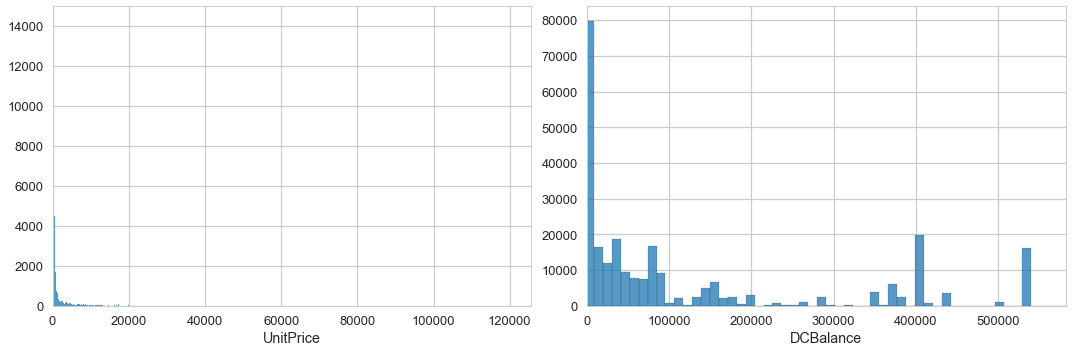

In [46]:
plt.figure(figsize=(15,5))
for i, col in enumerate(two_cols):
    plt.subplot(1,2,i+1)
    sns.histplot(data=data, x=col)
    
    # since our data is heavily skewed to the left, we'll need to zoom in there 
    # we will need to filter out a percentage of x datapoints containing minimal data
    
    set_xlim_percentage = 0.15
    plt.xlim(0, data[col].max() * set_xlim_percentage)
    
    plt.ylabel('')
    plt.tight_layout()
plt.savefig(f'img/4.png', bbox_inches='tight')

<font color=#e71d36>
    <strong>Discussion:</strong><br>
- It seems most customers purchase items with a unit price of up to R20,000<br>
- The histplot on the left suggests that the business has sold items even significantly higher than R120,000 even though these purchases are few and far between<br>
- The histplot on the right suggests that the business sells items to customers having a widely distributed DC Balance. The data is fairly skewed to the left. We should assess later the correlation between DC Balance and Purchase price.
</font>

In [47]:
pd.set_option('display.float_format', '{:.2f}'.format)
data[['UnitPrice','DCBalance']].describe()

,UnitPrice,DCBalance
count,405843.00,405843.00
mean,1307.58,506770.50
std,3912.06,1101536.93
min,0.00,-176044.76
25%,178.14,0.00
50%,345.27,44253.27
75%,811.54,402386.72
max,837212.25,3883875.28


## **Customer Sales distribution by Date**

In [49]:
# We will need to create a new month column which will represent the transaction month as an integer
# This is to ensure matplotlib orders our dates according to calender and not alphabetically

# We will map the below dictionary to create our new months column
int_months = {'January':1,'February':2,'March':3,'April':4,'May':5,
              'June':6,'July':7,'August':8,'September':9,'October':10,
              'November':11,'December':12}

data['Sales_months'] = data['SlsMonth'].map(int_months)

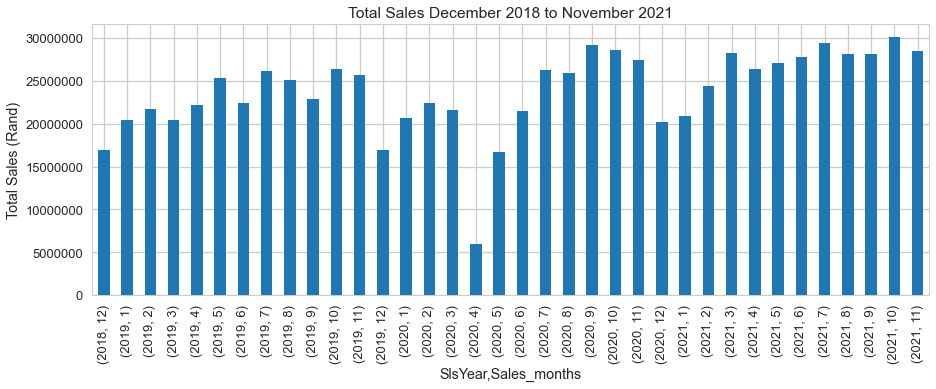

In [55]:
# To assess sales by each month, we will group by the year and month column and plot the results

plt.figure(figsize=(15,5))
plt.ticklabel_format(useOffset=False, style='plain')
data.groupby(['SlsYear','Sales_months']).sum()['Salesvalue'].plot(kind='bar',stacked=True)
plt.ylabel('Total Sales (Rand)')
plt.title('Total Sales December 2018 to November 2021')
plt.savefig('img/5.png', bbox_inches='tight')

Tableau can help us easily plot the graph as shown below. Each bar represents month, and we can assess performance month on month.

<img src="others/tableau_plot.JPG">

<font color=#e71d36>
    <strong>Discussion:</strong><br>
- Sales Peak between July and October year on year.<br>
- December and January record the lowest sales for the year due to obvious reasons.<br>
- The significant deep on April 2020 would most likely been caused by the start of the lockdown period.
</font>

To analyze sales by customers, we need a suitable categorical feature with which to link customers who have a similar feature such as their location, or their gender, or age. The dataset does not breakdown our customers into categories of interest. However we have a column under the SALES table specifying the nature of business the customer is involved in. We will use this in our analysis. <br>
<br>
There are a total of 19 categories under this column. We will focus on the customers who lie within the top 15 of these.

In [56]:
# we will filter the NatureofBus column to include only the categories which lie in the to 15 
# we will create a filter array first

filter_cust = data.groupby(['NatureofBus']).sum().sort_values(by='SlsYear',axis=0, ascending=False)['SlsYear'][0:16].index

In [57]:
# Let's groupby 'NatureofBus', Year and Month

customer_vs_sales_by_month = data[data['NatureofBus'].isin(filter_cust)].groupby(['SlsYear',
                                                    'Sales_months','NatureofBus']).sum()['Salesvalue'].unstack()
customer_vs_sales_by_month.head(2)

,NatureofBus,Agriculture Forestry & Fishing,Construction,Elictricity Gas & Water,Export - Africa Direct,Export - Africa Indirect(to export house),Export - Other Direct,Export - Other Indirect (to export house),Manufacturing - Motor,Manufacturing - Other,Mining & Quarries,Mining & Quarries - Gold & Uranium,Mining - Other,Other,Transport Storage & Communication,Wholesale & Retail - Motor,Wholesale & Retail - Other
SlsYear,Sales_months,,,,,,,,,,,,,,,,
2018,12,66116.07,3548563.45,2427090.85,312003.74,45549.15,1961.82,15820.03,615570.08,427103.48,6050181.43,158760.75,328705.28,1535179.66,525019.24,306119.30,536909.55
2019,1,109753.80,3739092.86,2727066.13,487497.59,207855.39,1914.80,381062.51,649297.18,484258.59,6639829.88,315224.48,417844.56,1746807.80,591761.64,895576.76,1055726.13


A common problem we encounter when we use groupby is that we create null values. Null values affect the way our plot looks. To correct this, I will create a function to replace all Null values with zero.

In [58]:
def replace_null_with_zero(cols):
    value = cols
    if pd.isnull(value):
        return 0
    else:
        return value

In [61]:
for col in customer_vs_sales_by_month.columns:
  customer_vs_sales_by_month[col] = customer_vs_sales_by_month[col].apply(replace_null_with_zero)

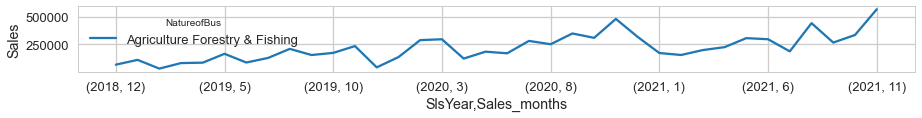

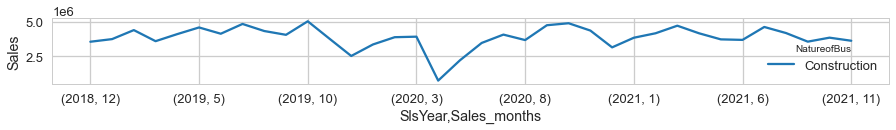

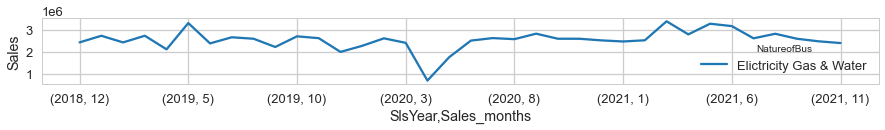

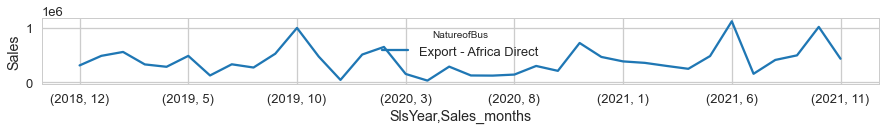

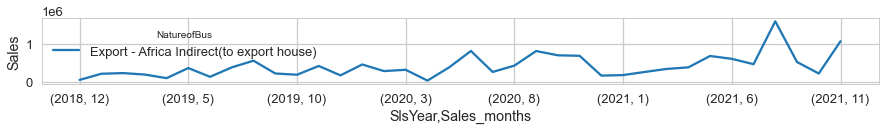

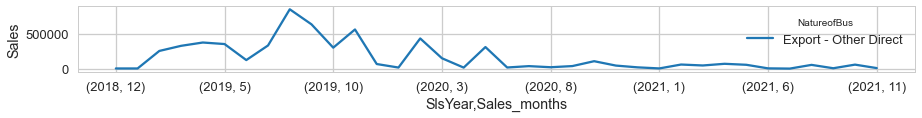

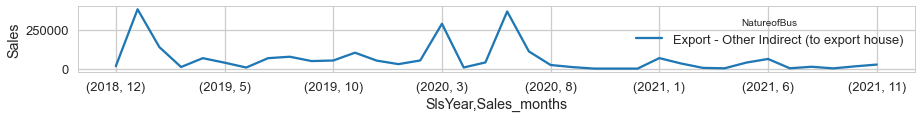

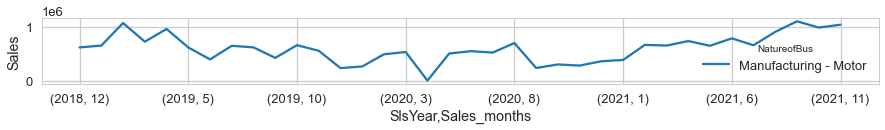

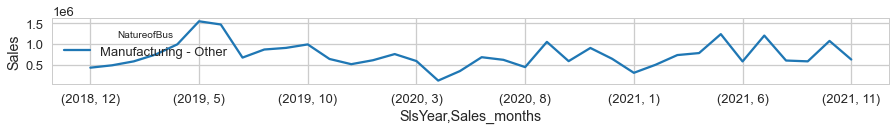

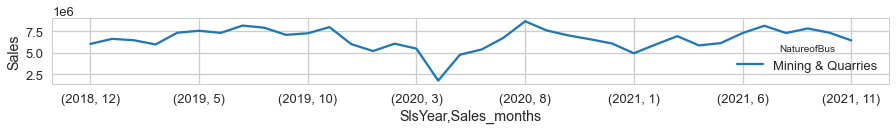

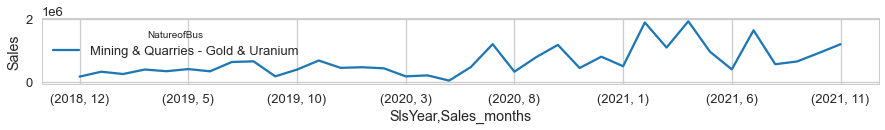

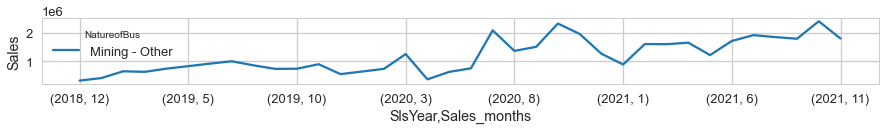

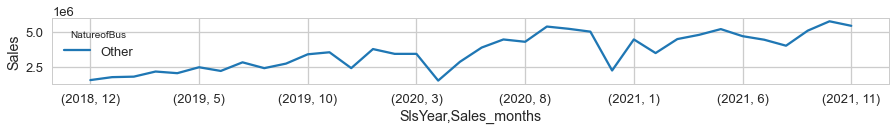

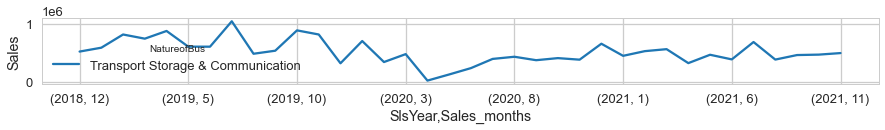

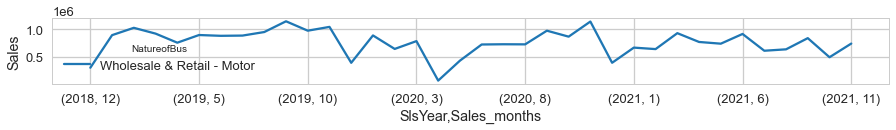

In [72]:
# Lets plot the sales of each 'Nature of Business' category as a line chart
for i in range(15):
    line_plot = customer_vs_sales_by_month.iloc[:,i:i+1].plot(figsize=(15,1.2))
#     line_plot.axes.set_xticks([])
    plt.ylabel('Sales')
plt.savefig('img/6.png', bbox_inches='tight')

<font color=#e71d36>
    <strong>Discussion:</strong><br>
- All customer segments (excluding Export) recorded sales consistently over the time period.<br>
- The customer segment recorded as 'Other' is showing an increase in sales over the entire time period, potentially showing 
signs of even more growth potential in the sector. It would be advantageous to have an actual description of the type
of work involved in this segment rather than having it labelled 'Other'.<br>
- The same can be said for Mining. The market is showing steady signs of growth. <br>
- Sales from Export customers (Exluding Africa) are low and have not recovered to pre-lockdown levels.
</font>

## **Sales by Item Class**

To analyze this, we will repeat the exercise from above with the only difference being that each graph will now represent a different product category. More specifically the Item Class.

In [73]:
sales_by_product_by_month = data.groupby(['SlsYear','Sales_months','ItemClass']).sum()['Salesvalue'].unstack()

In [74]:
for col in sales_by_product_by_month.columns:
  sales_by_product_by_month[col] = sales_by_product_by_month[col].apply(replace_null_with_zero)

In [77]:
sales_by_product_by_month.head(2)

,ItemClass,Air Filter,Bulk Filtration,Cabin Air Filter,Coolant,Coolant Filter,Exhaust,Fuel Filter,Hardware,Hydraulic Filter,Industrial Filter,Kits,Lube Filter,O-rings,Oil Filter,Other
SlsYear,Sales_months,,,,,,,,,,,,,,,
2018,12,3227267.44,33207.56,157912.58,332813.64,6041.52,251484.34,1420586.93,360151.67,1188443.07,154846.40,1538949.55,651990.05,18197.92,981.52,7559253.72
2019,1,3837923.94,11266.24,130997.76,242035.19,15509.19,451218.98,1736207.74,891672.70,1280221.11,423176.42,1535506.95,917165.17,31485.63,2369.60,8946430.21


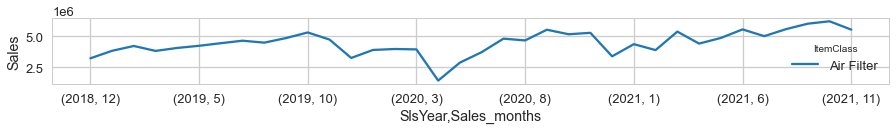

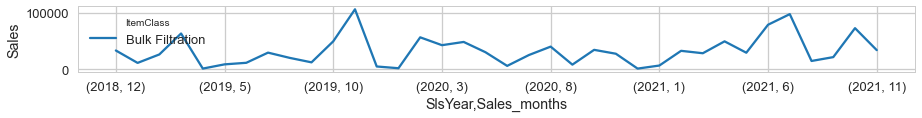

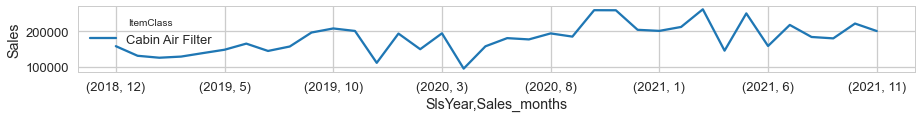

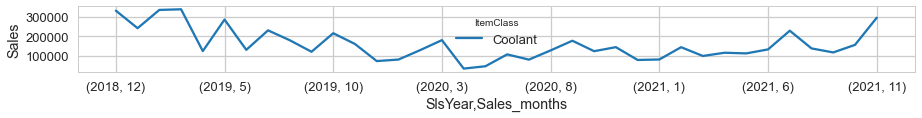

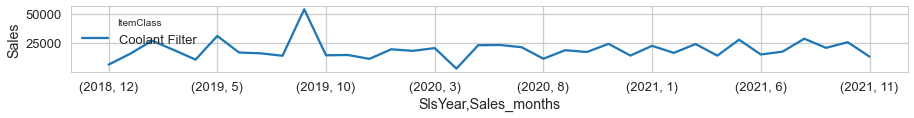

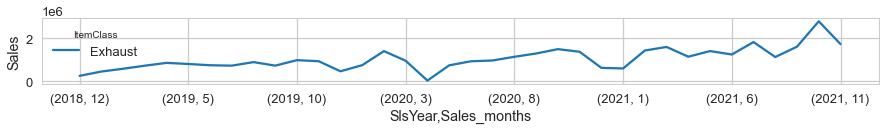

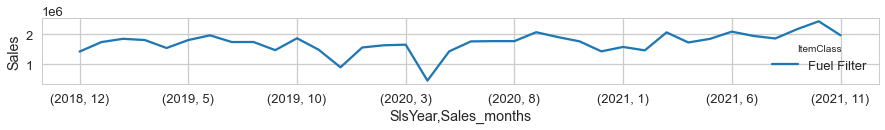

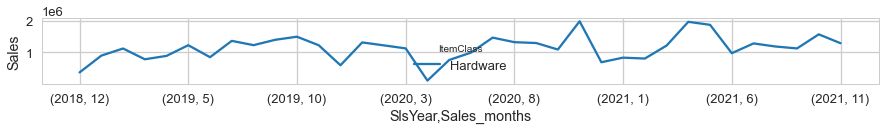

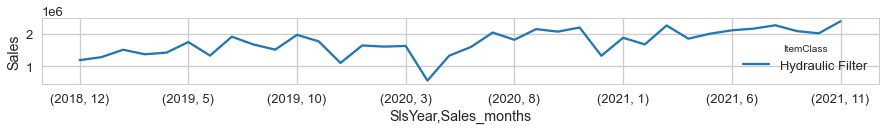

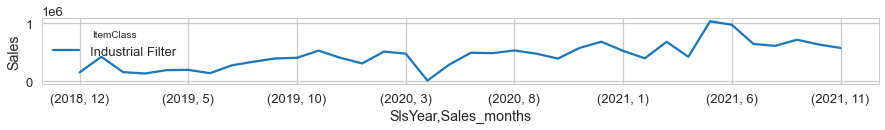

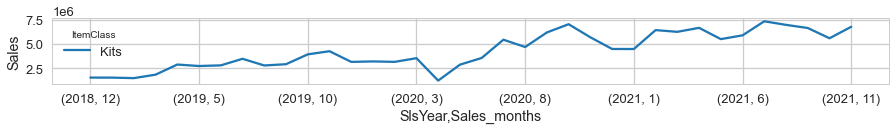

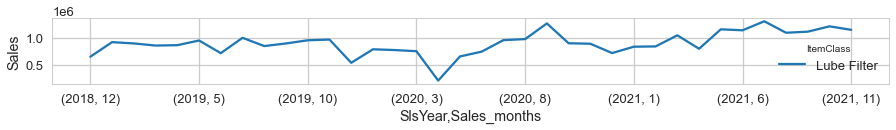

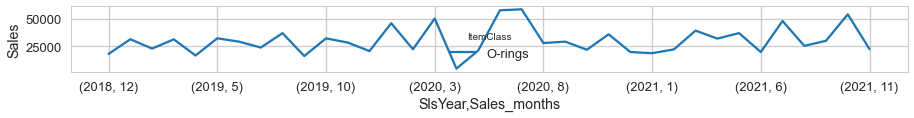

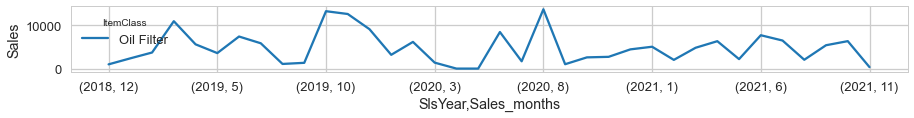

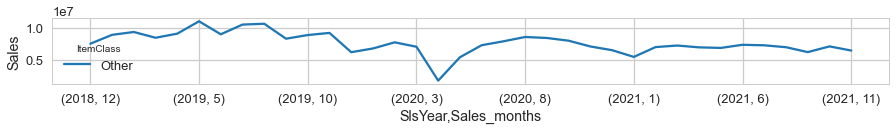

In [92]:
for i in range(15):
    line_plot = sales_by_product_by_month.iloc[:,i:i+1].plot(figsize=(15,1.2))
    plt.ylabel('Sales')
#     line_plot.axes.set_xticks([])
#     plt.xlabel('')
plt.savefig('img/7.png', bbox_inches='tight')

We will plot the above line graphs on the same axis to better analyze how each product's sales compares with the rest.

In [82]:
sales_by_product = data.groupby(['SlsYear','Sales_months','ItemClass']).sum()['Salesvalue'].unstack()

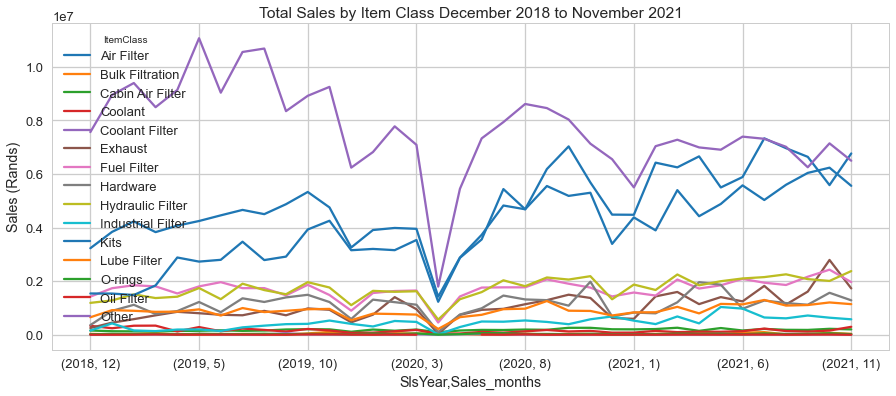

In [96]:
sales_by_product.plot(figsize=(15,6))
plt.title('Total Sales by Item Class December 2018 to November 2021')
plt.ylabel('Sales (Rands)')
plt.savefig('img/8.png', bbox_inches='tight')

<font color=#e71d36>
    <strong>Discussion:</strong><br>
- Air, Lube, Fuel, Hydraulic, Industrial filters have shown an upward growth trajectory. This is also true for Exhausts, Kits and Hardware<br>
- Items currently being recorded as 'Other' have shown domination however they have not been able to recover to pre-pandemic levels.<br>
- All other Items are showing a general recovery to pre-pandemic levels and are also improving <br>
- The decrease of Sales of items currently recorded as 'Other' is the main reason why we do not see a higher increase in overall sales in the business for post pandemic periods..
</font>

To analyze total sales, below is a bar chart assessing Total sales based on products for the entire period

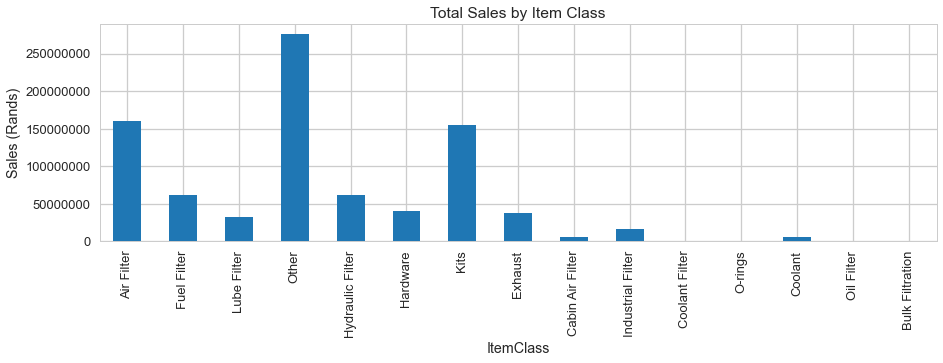

In [97]:
plt.ticklabel_format(useOffset=False, style='plain')
data.groupby(['ItemClass']).sum().sort_values(by='SlsYear',
                                              axis=0, ascending=False)['Salesvalue'].plot(kind='bar',figsize=(15,4))
plt.title('Total Sales by Item Class')
plt.ylabel('Sales (Rands)')
plt.savefig('img/9.png', bbox_inches='tight')

Next, we will analyze our product sales and see how our different customers mainly shop in the business

In [98]:
# let's create a new dataframe using the groupby method
# this dataframe will have Products as the keys and customers as column names

customer_vs_product = data.groupby(['ItemClass','NatureofBus']).sum()['Salesvalue'].unstack()

# again we will need to eliminate null values

for col in customer_vs_product.columns:
  customer_vs_product[col] = customer_vs_product[col].apply(replace_null_with_zero)

customer_vs_product.head(2)

NatureofBus,Agriculture Forestry & Fishing,Community Services,Construction,Elictricity Gas & Water,Export - Africa Direct,Export - Africa Indirect(to export house),Export - Other Direct,Export - Other Indirect (to export house),Manufacturing - Motor,Manufacturing - Other,Mining & Quarries,Mining & Quarries - Gold & Uranium,Mining - Other,Other,Security,Transport Storage & Communication,Wholesale & Retail - Motor,Wholesale & Retail - Other
ItemClass,,,,,,,,,,,,,,,,,,
Air Filter,2357664.29,58132.91,23175727.41,3065833.88,3354857.41,1225477.16,148160.65,786604.03,3983676.70,5121142.34,43783851.26,2248028.51,3951674.19,34351574.39,15046.39,1971837.87,12290904.82,19120809.94
Bulk Filtration,4026.22,0.00,99664.26,67901.32,73940.28,0.00,0.00,0.00,100573.11,4634.37,105017.11,31688.15,1280.81,422291.79,0.00,136496.64,34108.99,82773.47


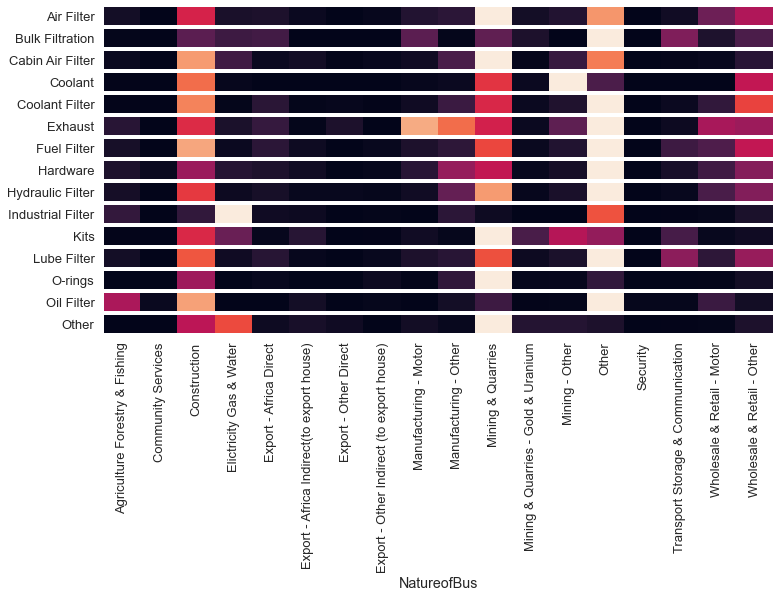

In [100]:
# let's plot individual heatmaps and stack them together

plt.figure(figsize=(12,6))
for i in range(15):
    plt.subplot(15,1,i+1)
#     plt.figure(figsize=(12,0.75))
    heatmap = sns.heatmap(customer_vs_product.iloc[i:i+1,:], cbar=False)
    heatmap.axes.set_xticks([])
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
    plt.ylabel('')
    plt.xlabel('')

heatmap = sns.heatmap(customer_vs_product.iloc[-1:,:], cbar=False)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.ylabel('')
plt.savefig('img/10.png', bbox_inches='tight')

<font color=#e71d36>
    <strong>Discussion:</strong><br>
- Items recorded as 'Other' (these represent a significant portion of the sales in all items) are mostly being sold to Mining & Quarries.<br>
- Customers who are recorded as 'Other' generate the most Sales. They moistly seem to buy filters for vehicles and hardware equipment.<br>
- Construction customers generally purchase all item categories. <br>
- This is also true for mining customers however they are more invested into filters and kits.
</font>

Next, we will investigate how the number of units sold, affects the overall total sales. We will plot a scatter plot to try and visualize this.

In [101]:
# we need to define x, y and the size variable which will be sales

x = data.groupby('SlsYear').count().index
y = data.groupby('SlsYear').count()['Salesvalue'].values
sales_by_year = data.groupby('SlsYear').sum()['Salesvalue'].values*0.001

In [102]:
# We then need to scale and multiply our size variable (sales) so that differences in sales are spotted

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sales_scaled = sc.fit_transform(data.groupby('SlsYear').sum()['Salesvalue'].values.reshape(-1,1))
sales_scaled = [60*50**n for n in sales_scaled[:,0]]

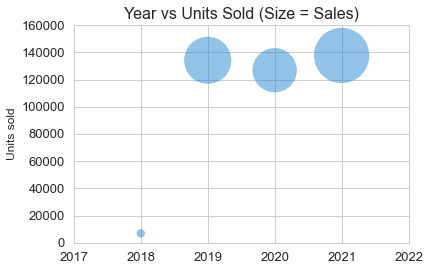

In [130]:
plt.figure(figsize=(6,4))
plt.scatter(x, y, s = sales_scaled, alpha=0.5)
plt.xlim(2017,2022)
plt.ylim(0,160000)
plt.ylabel('Units sold')
plt.title('Year vs Units Sold (Size = Sales)')
plt.savefig('img/11.png', bbox_inches='tight')

<font color=#e71d36>
    <strong>Discussion:</strong><br>
- The number of units sold seems to be correlated to sales.<br>
- The business is showing an overall steady increase in sales. The dip n performance for year 2020 is due to obvious reasons, however the upward trend is still ongoing.<br>
</font>

## **PART 4: CUSTOMER SEGMENTATION**

We will now investigate Sales based on the 'Nature of Business' column to see if we can uncover any insights in our date

In [131]:
# we will have to split our 'Nature of Business' categories
# we will do this to ensure we are not missing out on any interesting trends in customers who are not the highest spenders

# the next line of codes will group by 'Nature of Business'
# the first df will be for the top ten categories, the second will contain the rest

sales_by_cust_top_10 = data.groupby(['NatureofBus']).sum().sort_values(by='SlsYear',axis=0, ascending=False)['SlsYear'][0:10]
sales_by_cust_top_20 = data.groupby(['NatureofBus']).sum().sort_values(by='SlsYear',axis=0, ascending=False)['SlsYear'][10:]

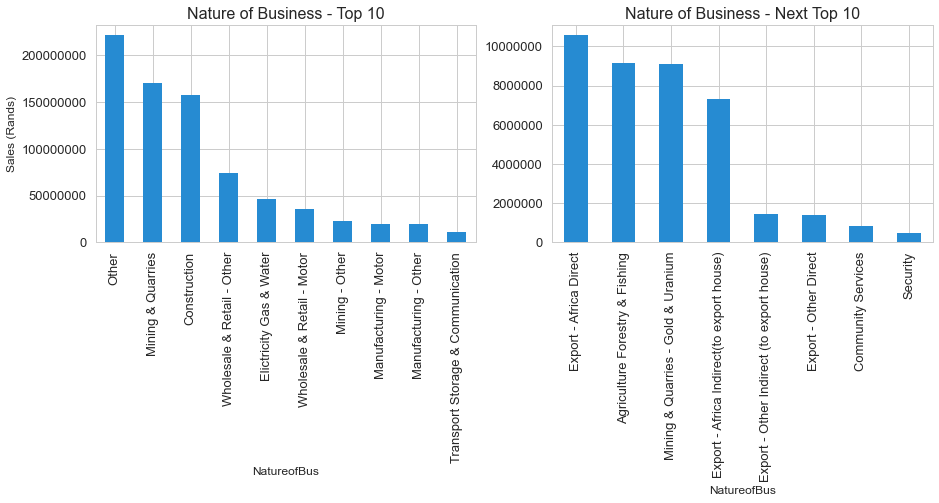

In [133]:
plt.subplot(1,2,1)
plt.ticklabel_format(useOffset=False, style='plain')
sales_by_cust_top_10.plot(kind='bar', figsize=(15,4))
plt.ylabel('Sales (Rands)')
plt.title('Nature of Business - Top 10')
plt.subplot(1,2,2)
plt.ticklabel_format(useOffset=False, style='plain')
sales_by_cust_top_20.plot(kind='bar', figsize=(15,4))
plt.title('Nature of Business - Next Top 10')
plt.savefig('img/12.png', bbox_inches='tight')

We should follow the same convention above to plot the next visualizations. I want to analyze the way our customers interest with the business based on month. We may be able to uncover patterns of spending.

In [135]:
# we will expand the above dataframes to now include the month column

filter_1 = sales_by_cust_top_10.index
filter_2 = sales_by_cust_top_20.index

sales_by_cust_top_10_by_mth = data[data['NatureofBus'].isin(filter_1)].groupby(['NatureofBus',
                                                                        'Sales_months']).sum().unstack()['SlsYear']
sales_by_cust_top_20_by_mth = data[data['NatureofBus'].isin(filter_2)].groupby(['NatureofBus',
                                                                        'Sales_months']).sum().unstack()['SlsYear']

# remove null values

for col in sales_by_cust_top_10_by_mth.columns:
  sales_by_cust_top_10_by_mth[col] = sales_by_cust_top_10_by_mth[col].apply(replace_null_with_zero)

for col in sales_by_cust_top_20_by_mth.columns:
  sales_by_cust_top_20_by_mth[col] = sales_by_cust_top_20_by_mth[col].apply(replace_null_with_zero)

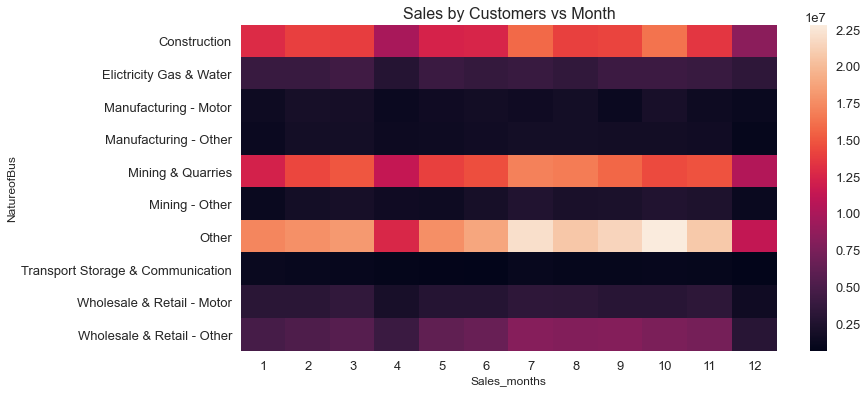

In [139]:
plt.figure(figsize=(12,6))
sns.heatmap(sales_by_cust_top_10_by_mth)
plt.title('Sales by Customers vs Month')
plt.savefig('img/13.png', bbox_inches='tight')

<font color=#e71d36>
    <strong>Discussion:</strong><br>
- Sales to customers recorded as 'Other' peak from July to October.<br>
- This is also true for mining customers however sales from these customers are uniform for the rest of the year.<br>
- All customers record their lowest sales in December and January.<br>
</font>

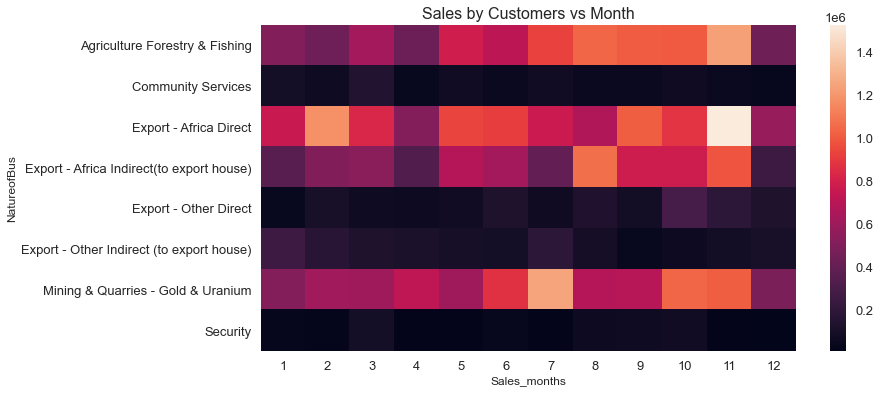

In [140]:
plt.figure(figsize=(12,6))
sns.heatmap(sales_by_cust_top_20_by_mth)
plt.title('Sales by Customers vs Month')
plt.savefig('img/14.png', bbox_inches='tight')

Next, we will assess the correlation of the column names 'DCBalance', 'fForeignBalance', and 'Credit_Limit' to overall Sales

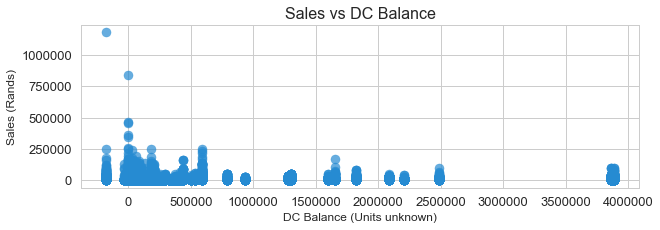

In [145]:
plt.figure(figsize=(10,3))
x = data['DCBalance'].values
y = data['Salesvalue'].values
plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(x, y, alpha=0.7)
plt.xlabel('DC Balance (Units unknown)')
plt.ylabel('Sales (Rands)')
plt.title('Sales vs DC Balance')
plt.savefig('img/15.png', bbox_inches='tight')

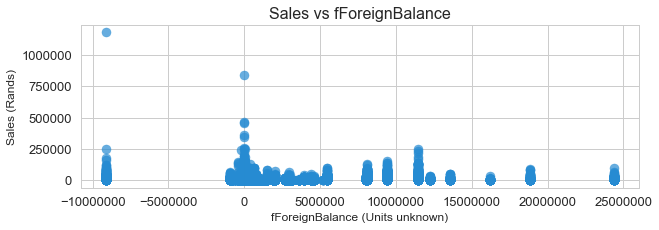

In [146]:
plt.figure(figsize=(10,3))
x = data['fForeignBalance'].values
y = data['Salesvalue'].values
plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(x, y, alpha=0.7)
plt.xlabel('fForeignBalance (Units unknown)')
plt.ylabel('Sales (Rands)')
plt.title('Sales vs fForeignBalance')
plt.savefig('img/17.png', bbox_inches='tight')

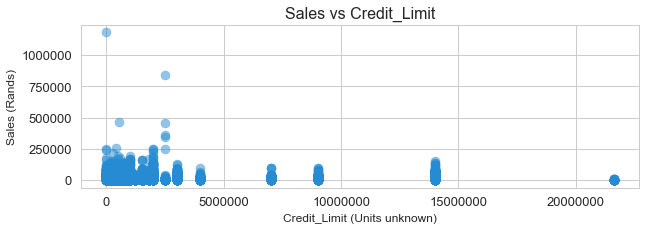

In [147]:
plt.figure(figsize=(10,3))
x = data['Credit_Limit'].values
y = data['Salesvalue'].values
plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Credit_Limit (Units unknown)')
plt.ylabel('Sales (Rands)')
plt.title('Sales vs Credit_Limit')
plt.savefig('img/18.png', bbox_inches='tight')

In [148]:
# calculating correlations

correlations = data[['Salesvalue','DCBalance','fForeignBalance','Credit_Limit']].corr()['Salesvalue']
correlations

Salesvalue        1.00
DCBalance         0.13
fForeignBalance   0.17
Credit_Limit      0.25
Name: Salesvalue, dtype: float64

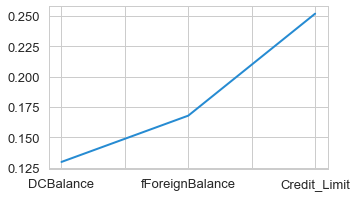

In [152]:
plt.figure(figsize=(5,3))
correlations[1:].plot()
plt.savefig('img/19.png', bbox_inches='tight')

<font color=#e71d36>
    <strong>Discussion:</strong><br>
- There doesn't appear to be a strong correlation between the 3 variables to overall sales.<br>
- The Credit limit is the most important variable. It seems we can expect higher sales from customers with a higher Credit limit.<br>
</font>

## **PART 5: PRODUCT ANALYSIS**

Next, we will be analyzing the 'Brand' column to assess the how different brands are sold.

In [153]:
sales_by_brand_top_10 = data.groupby(['Brand']).sum().sort_values(by='SlsYear',
                                                                axis=0, ascending=False)['SlsYear'][:10]

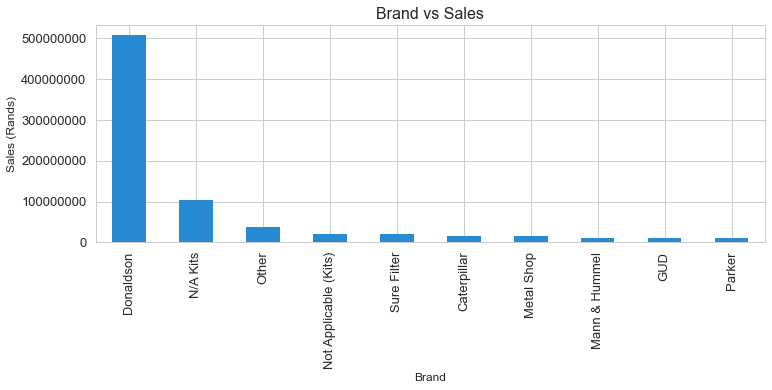

In [155]:
plt.ticklabel_format(useOffset=False, style='plain')
sales_by_brand_top_10.plot(kind='bar', figsize=(12,4))
plt.ylabel('Sales (Rands)')
plt.title('Brand vs Sales')
plt.savefig('img/20.png', bbox_inches='tight')

Next, we will look at which brands customers engage with regards to the products sold in the business.

In [156]:
product_vs_brand = data.groupby(['ItemClass','Brand']).sum()['Salesvalue'].unstack()

for col in product_vs_brand.columns:
  product_vs_brand[col] = product_vs_brand[col].apply(replace_null_with_zero)

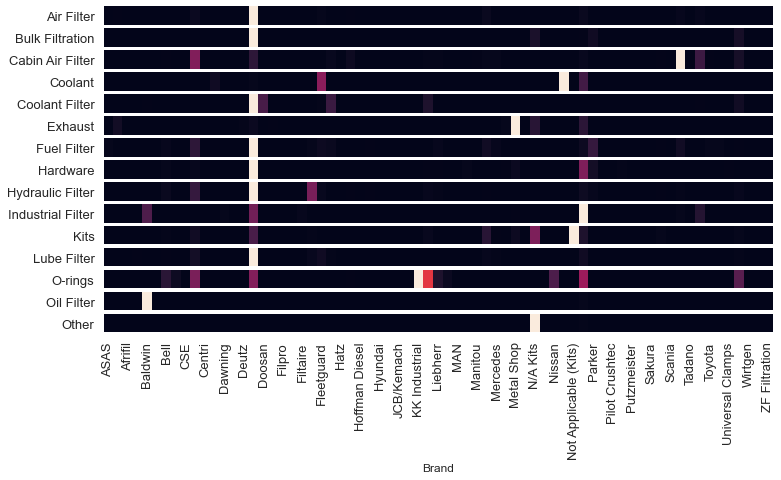

In [159]:
plt.figure(figsize=(12,6))
for i in range(15):
    plt.subplot(15,1,i+1)
#     plt.figure(figsize=(12,0.75))
    heatmap = sns.heatmap(product_vs_brand.iloc[i:i+1,:], cbar=False)
    heatmap.axes.set_xticks([])
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
    plt.ylabel('')
    plt.xlabel('')

heatmap = sns.heatmap(product_vs_brand.iloc[-1:,:], cbar=False)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.ylabel('')
plt.savefig('img/21.png', bbox_inches='tight')

<font color=#e71d36>
    <strong>Discussion:</strong><br>
- It seems customers either trust 1 brand for each item or the business only sells 1 kind of brand for each item.<br>
- The brand name Doosan seems to dominate sales for most products.<br>
</font>

## **PART 6: DATA MODELLING OPTIMIZATION**

Current data model

<img src="others/current_data_model.jpg">

The following steps detail what I would do to improve the data model to improve efficiency with how we engage with the database.<br>
<br>
- The tables in the database are cluttered due to their many columns. We need to drastically decrease the number of columns in the **SALES** table by removing columns which are already in **INVENTORY** and **CUSTOMERS** table. These include Customer_name, Description_1,  ItemGroup, ItemGroupname, Period, FinPeriod, RepName, repdivision, WeightValue and all the date columns (to be reasoned below).<br>
- For the **INVENTORY** table, it would be wise to address the 3 'description' columns. It is bad practice to add a new column for data that already has a dedicated column. There are also way too many columns. With background knowledge, these can be addressed. For this exercise, I advise collapsing the three descritpion columns into 1.<br>
- For the **CUSTOMERS** table, the same issue as above is seen where we have 3 'address' columns. These appear to be related. Therefore the only sensible option would be to collapse the 3 columns into 1. There are too many columns in this table and it seems they are to blame for why the table has so many NULL values. These need to be removed.
- We need to eliminate confusion, Primary keys need to be easily spotted on every table. We need to rename all Primary_key columns to include the ending 'ID'. So for the **CUSTOMERS** table, we need a 'Customer_ID' instead of 'Customer_account'. For the **INVENTORY** table, we need a 'Stock_ID' instead of 'StockLink' and so on. 
- In conclusion I would advise there to be an **'ORDERS'** table. This will contain all the unique orders processed in the business. This table will be linked to the **SALES** table using an Order_ID. The most important columns in this table would be the Order_ID and date of transaction. We will then be able to delete the columns pertaining to date from the **SALES** tables.

Proposed data model

<img src="others/proposed_data_model.jpg">

In [158]:
#end